بر روی دیتاست ماه چیست و با چه روش هایی حل میشود projection مشکل

داده هایی که کورولیشن بالای خطی دارند روی داده های گل زنبق را با الگوریتم زیر حذف کنید

FactorAnalysis (mean)


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
iris_data = pd.read_csv("iris.csv")

In [4]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
X=iris_data.drop(['species'],axis=1).values
y=iris_data['species'].values

In [6]:
X.shape

(150, 4)

In [7]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(y)

In [8]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train= stdsc.fit_transform(X) 

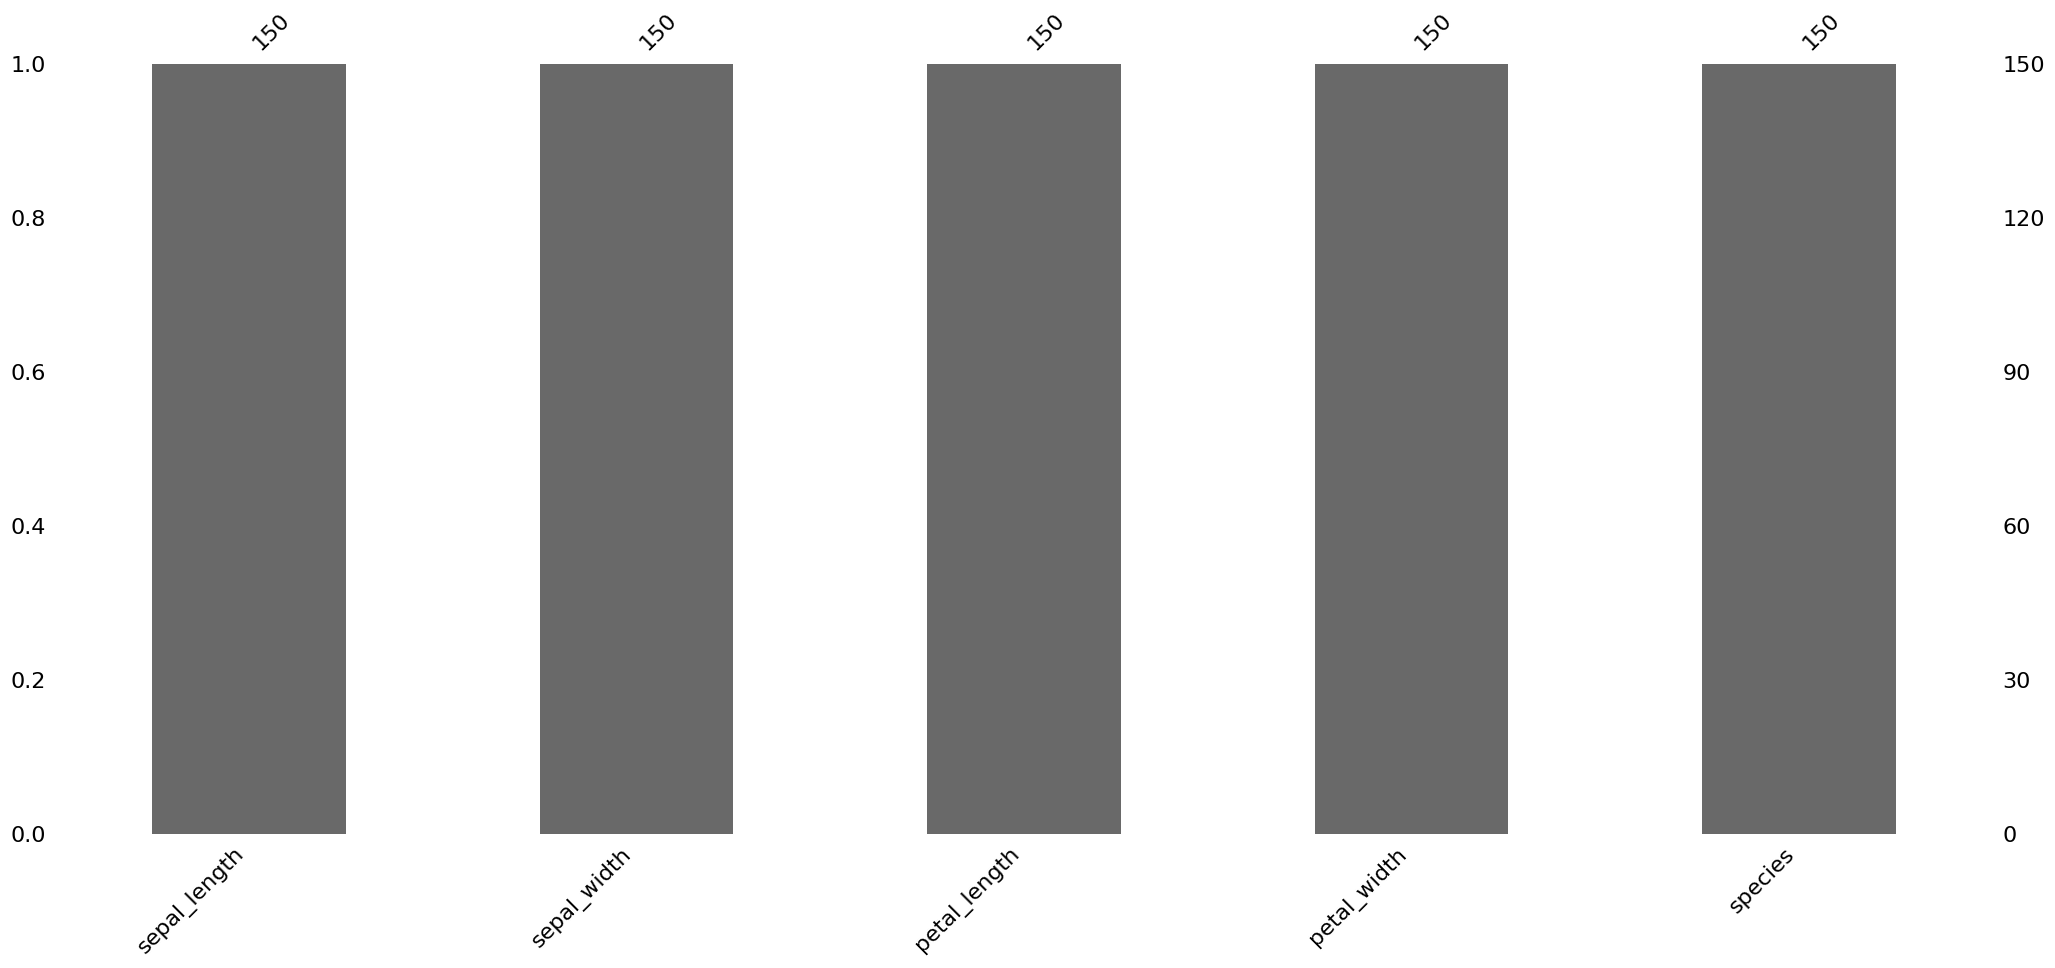

In [9]:
import missingno as msno
p=msno.bar(iris_data)#No missing data

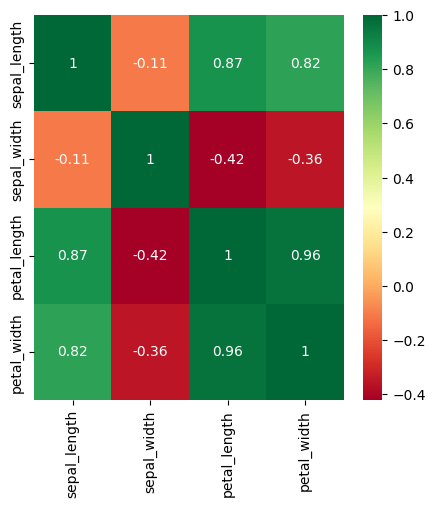

In [10]:
plt.figure(figsize=(5,5))
p=sns.heatmap(iris_data.corr(), annot=True,cmap='RdYlGn') 

In [11]:
from sklearn.decomposition import FactorAnalysis

In [12]:
transformer = FactorAnalysis(n_components=2, random_state=0)

In [13]:
X_transformed = transformer.fit_transform(X_train)

In [14]:
 X_transformed.shape

(150, 2)

ابعاد را به 1 کاهش دهید lda حال با استفاده از

### the spicies column has 3 class and the number of n_component of LDA is n_classes - 1==>3-1=2

In [82]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)#
X_train_lda = lda.fit_transform(X_train, y)


In [84]:
data=pd.DataFrame(X_train_lda)
data['class']=y
data.columns=["LD1","class"]
data.head()

,LD1,class
0,8.084953,0
1,7.147163,0
2,7.511378,0
3,6.837676,0
4,8.157814,0


# *******************************************************************************************************************

ICA

برای داده های که ویژگی های آنها کورولیشن غیر خطی دارند استفاده میشود

isomap

فاصله ها را استفاده کرده و از منیفولد استفاده میکند

روی دیتای ماه آن را تست کنید و تغییرات را با پلات کردن نشان دهید

In [39]:
from sklearn.datasets import make_moons

In [48]:
X1, y1= make_moons(n_samples=250, noise=0.05, random_state=42)

In [49]:
pd.DataFrame(X1).head()

,0,1
0,0.084154,0.113341
1,1.050915,0.154710
2,-0.716555,0.675608
3,0.060932,0.926542
4,-1.005525,0.336425


In [50]:
pd.DataFrame(y1, columns = ['Valor Real']).head()

,Valor Real
0,1
1,0
2,0
3,0
4,0


In [51]:
colors = ['maroon', 'forestgreen']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [69]:
scaler = StandardScaler()
scaled_features1 = scaler.fit_transform(X1)
pd.DataFrame(scaled_features1).head()

,0,1
0,-0.480231,-0.280327
1,0.627711,-0.196660
2,-1.397871,0.856836
3,-0.506845,1.364341
4,-1.729040,0.170852


In [53]:
from sklearn.decomposition import FastICA

In [70]:
transformer = FastICA(n_components=7,
 random_state=0,   whiten='unit-variance')
X_transformed1 = transformer.fit_transform(scaled_features1)

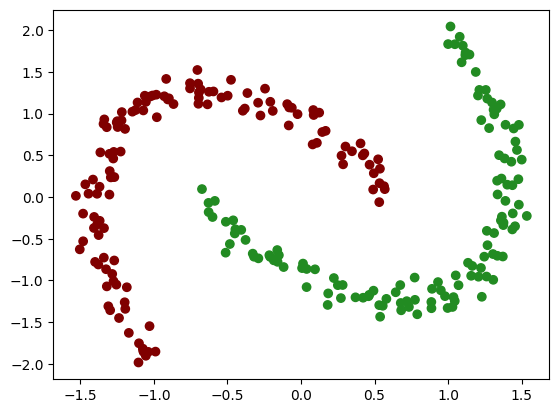

In [71]:
plt.scatter(X_transformed1[:,0], X_transformed1[:,1], c=vectorizer(y1))

### isomap

In [66]:
from sklearn.manifold import Isomap

In [72]:
iso = Isomap(n_neighbors=2, n_components=2)
iso.fit(scaled_features1)

my_isomap = iso.transform(scaled_features1)

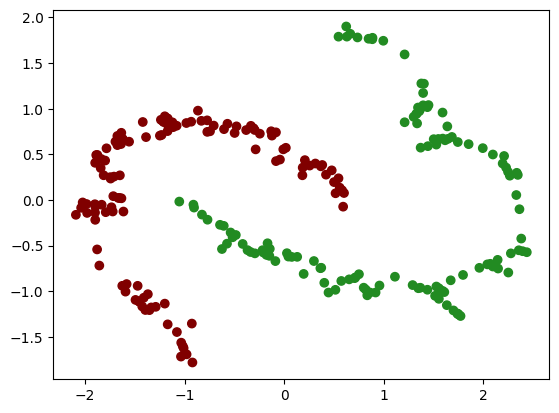

In [73]:
plt.scatter(my_isomap[:,0],my_isomap[:,1], c=vectorizer(y1))

tsne

با استفاده از گراف و همسایگی این کار را انجام میدهد و هم نقاط دور را در از هم 

در نظر میگیرد لوکال و گلوبال را در نظر می گیرد

با استفاده از 

umap 

که سرعت پایین الگوریتم قبل را بهبود بخشیده  دیتای ماه را کاهش ابعاد دهید و در انتها با رسم پلات عملکرد ها را مقایسه کنید

(با هر دو الگوریتم این کار را انجام دهید)


In [75]:
from sklearn.manifold import TSNE

In [76]:
tsne = TSNE(random_state = 42, n_components=2,verbose=1, perplexity=5, n_iter=1000).fit_transform(scaled_features1)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 250 samples in 0.001s...
[t-SNE] Computed neighbors for 250 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 250 / 250
[t-SNE] Mean sigma: 0.088125
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.572247
[t-SNE] KL divergence after 1000 iterations: 0.221557


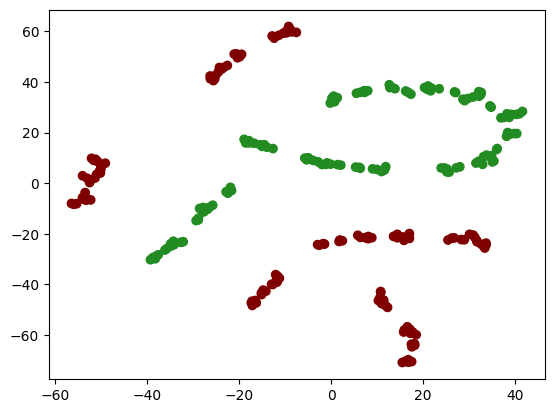

In [77]:
plt.scatter(tsne[:,0],tsne[:,1], c=vectorizer(y1))

In [78]:
import umap
embedding = umap.UMAP(n_neighbors=6,
                      min_dist=0.001,
                      metric='correlation').fit_transform(scaled_features1)

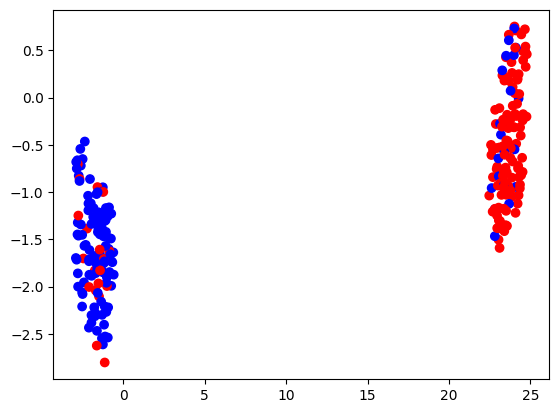

In [86]:
plt.scatter(embedding[:,0],embedding[:,1], c=vectorizer(y1))

یک شبکه عصبی به صورت سریالی با کتابخانه کراس بسازید و آن را در فایلی سیو کنید

In [87]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [88]:
tf.random.set_seed(42)
model = keras.Sequential([
layers.Dense(300, activation="relu"),
layers.Dense(100, activation="relu"),
layers.Dense(10, activation="softmax")
])

In [89]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="Adam",
metrics=["accuracy"])

In [90]:
# For moon dataset
history = model.fit(X1, y1, epochs=10,
validation_data=(X1, y1))

Epoch 1/10
8/8 [==============================] - 2s 45ms/step - loss: 2.0710 - accuracy: 0.5360 - val_loss: 1.7743 - val_accuracy: 0.7800
Epoch 2/10
8/8 [==============================] - 0s 15ms/step - loss: 1.5571 - accuracy: 0.8000 - val_loss: 1.2465 - val_accuracy: 0.8080
Epoch 3/10
8/8 [==============================] - 0s 14ms/step - loss: 1.0290 - accuracy: 0.8160 - val_loss: 0.7591 - val_accuracy: 0.8200
Epoch 4/10
8/8 [==============================] - 0s 15ms/step - loss: 0.6153 - accuracy: 0.8280 - val_loss: 0.4623 - val_accuracy: 0.8440
Epoch 5/10
8/8 [==============================] - 0s 15ms/step - loss: 0.4008 - accuracy: 0.8440 - val_loss: 0.3462 - val_accuracy: 0.8520
Epoch 6/10
8/8 [==============================] - 0s 15ms/step - loss: 0.3259 - accuracy: 0.8560 - val_loss: 0.3054 - val_accuracy: 0.8600
Epoch 7/10
8/8 [==============================] - 0s 19ms/step - loss: 0.2954 - accuracy: 0.8640 - val_loss: 0.2818 - val_accuracy: 0.8560
Epoch 8/10
8/8 [===========

In [110]:
from tensorflow.keras.models import Sequential, save_model, load_model

In [112]:
filepath = 'Sequentional'
save_model(model, filepath)

linux

1- در لینوکس برای مخفی سازی از چی استفاده میشود و برای دید فایل های مخفی چه کلیدی در دستور

ls

استفاده میشود

2- آپشن های دستور زیر تحلیل کنید
ls -lahtr

-R رو هم توضیح دهید

3- در تصویر زیر منظور از فلش ها چیست

۱.برای نمایش فایل های مخفی----->ls -a                                                 
برای مخفی سازی-----> mv mv

2.دستور ls -R در لینوکس برای لیست کردن فولدرها بصورت درختی استفاده می شود.

3.The command "ls -l" uses "->" to denote a symbolic-link

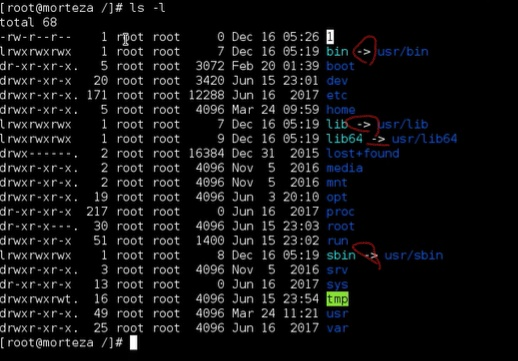
